<a href="https://colab.research.google.com/github/sukamadev/Projeto-Final-Soulcode/blob/main/Projeto_Final_Soulcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração do ambiente

In [ ]:
# instalando a lib mysql-connector-python
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.7 MB/s eta 0:00:00


In [ ]:
# Gerando Link do colab
!curl ipecho.net/plain

34.71.169.131

In [ ]:
# Importando a biblioteca Pandas
import pandas as pd

In [ ]:
# Função para executar consultas e retornar DataFrame.
# importar o mysql.connector e pandas
import mysql.connector as mc

# Recebe uma consulta.
def queryDf(query):
  # Definir variáveis de conexao
  host = '34.44.251.68' # Endereço do servidor MySQL
  user = 'root'         # Nome de usuário do MySQL
  password = ''         # Senha do MySQL (deve ser definida para a conexao)
  database = 'tnt_bebidas'  # Nome do banco de dados a ser utilizado

  # Estabelecimento da conexao com o banco de dados
  connection = mc.connect(
      host=host,
      user=user,
      password=password,
      database=database
  )

  # Criação de um cursor para executar consultas SQL
  cursor = connection.cursor()

  # Execução da consulta passada como argumento para a função
  cursor.execute(query)

  # Recuperar os dados da consulta
  result = cursor.fetchall()

  # Conversão dos resultados em um DataFrame do Pandas, usando os nomes das colunas obtidas do cursor
  df = pd.DataFrame(result, columns=cursor.column_names)

  # Fechamento do cursor após a execução da consulta
  cursor.close()

  # Fechamento da conexão com o banco de dados
  connection.close()

  return df

# Conexão com Google Cloud



In [ ]:
# Importando Storage do Google Cloud
from google.cloud import storage
# Im
from sqlalchemy import create_engine

In [ ]:
# Importando google autenticador
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Iniciando a varável que recebe o ID do projeto
project_id = 'micro-spanner-433123-r3'
# Configurando o ID do Projeto a ser utilizado
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
# Importsando Storage do Google
from google.cloud import storage
# Importando a classe Client do módulo storage
client = storage.Client()
# Definindo o nome do bucket do Google Cloud Storage
bucket_name = 'projeto_final_soul_code'
# Criando um objeto bucket que faz referência ao bucket com o nome especificado
bucket = client.bucket(bucket_name)

In [ ]:
# instalando um upgrade do google-cloud-storage
!pip install --upgrade google-cloud-storage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 2.8.0
    Uninstalling google-cloud-storage-2.8.0:
      Successfully uninstalled google-cloud-storage-2.8.0


In [ ]:
import mysql.connector

# Dados de conexão ao banco de dados
config = {
    'user': 'root',          # Usuário do banco de dados
    'password': '',        # Senha do usuário
    'host': '34.44.251.68',  # Endereço IP ou nome do host da instância Cloud SQL
    'database': 'tnt_bebidas'     # Nome do banco de dados
}

# Estabelecer a conexão
conn = mysql.connector.connect(**config)
cursor = conn.cursor()

# Criação de tabelas no Banco de Dados
Obs: A criação de tabelas foi feita diretamente do Cloud Shell, portando, este bloco de código serve apenas para demostração de conhecimento, não sendo necessária a sua execussão.

MER
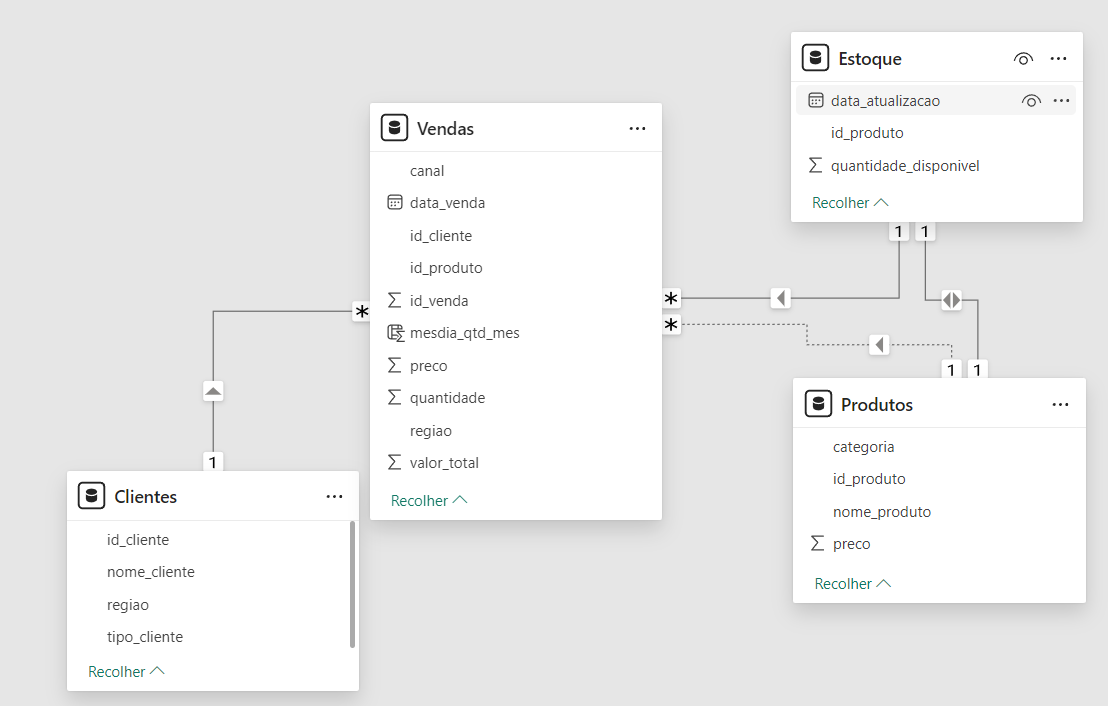

In [ ]:
# Criando a Tabela Produtos
queryDf('''
            create table Produtos (
            id_produto int primary key,
            nome_produto varchar(50),
            categoria varchar(50),
            preco float
            );
''')

In [ ]:
# Criando a Tabela Clientes
queryDf('''
            create table Clientes (
            id_cliente int primary key,
            nome_cliente varchar(50),
            tipo_cliente varchar(50),
            regiao varchar(50)
            );
''')

In [ ]:
# Criando a Tabela Esqtoque
queryDf('''
            create table Estoque (
            id_produto int,
            quantidade_disponivel int,
            data_atualizacao timestamp
            );
''')

In [ ]:
# Criando a Tabela Produtos
queryDf('''
            create table vendas (
            id_venda int primary key,
            data_venda timestamp,
            id_produto int,
            id_cliente int,
            quantidade int,
            canal varchar(50),
            regiao varchar(50),
            preco float,
            valor_total float,
            foreign key (id_produto) references produtos(id_produto),
            foreign key (id_cliente) references clientes(id_cliente)
            );
''')

# Carregando Registros na Tabela Clientes

In [ ]:
# Lendo o DataFrame df_clientes direto da Bucket
df_clientes = pd.read_csv('https://storage.googleapis.com/projeto_final_soul_code/dados_brutos/empresa_bebidas_clientes.csv')
# Mostrando o DataFrame
display(df_clientes)

,id_cliente,nome_cliente,tipo_cliente,regiao
0,1,Cliente 1,Pessoa Física,Sul
1,2,Cliente 2,Pessoa Jurídica,Norte
2,3,Cliente 3,Pessoa Física,Sul
3,4,Cliente 4,Pessoa Física,Oeste
4,5,Cliente 5,Pessoa Física,Oeste
5,6,Cliente 6,Pessoa Jurídica,Sul
6,7,Cliente 7,Pessoa Física,Sul
7,8,Cliente 8,Pessoa Física,Sul
8,9,Cliente 9,Pessoa Física,Oeste
9,10,Cliente 10,Pessoa Jurídica,Oeste


In [ ]:
# Criando uma Função que insere os registros no Danco de Dados
def insere_registro(df, cursor, conn):
    for i, row in df.iterrows():
        # Comando SQL de inserção
        sql = """INSERT INTO Clientes (id_cliente, nome_cliente, tipo_cliente, regiao)
                 VALUES (%s, %s, %s, %s)"""

        # Obtenção dos dados de cada linha do DataFrame
        values = (row['id_cliente'], row['nome_cliente'], row['tipo_cliente'], row['regiao'])

        # Execução do comando
        cursor.execute(sql, values)

    # Commit para salvar as alterações no banco de dados
    conn.commit()

# Inserir o DataFrame na tabela
insere_registro(df_clientes, cursor, conn)

In [ ]:
# Consultando todas as linhas inseridas na Tabela Clientes
queryDf("select * from Clientes")

,id_cliente,nome_cliente,tipo_cliente,regiao
0,1,Cliente 1,Pessoa Física,Sul
1,2,Cliente 2,Pessoa Jurídica,Norte
2,3,Cliente 3,Pessoa Física,Sul
3,4,Cliente 4,Pessoa Física,Oeste
4,5,Cliente 5,Pessoa Física,Oeste
5,6,Cliente 6,Pessoa Jurídica,Sul
6,7,Cliente 7,Pessoa Física,Sul
7,8,Cliente 8,Pessoa Física,Sul
8,9,Cliente 9,Pessoa Física,Oeste
9,10,Cliente 10,Pessoa Jurídica,Oeste


# Carregando Registros na Tabela Estoque

In [ ]:
# Lendo o DataFrame df_clientes direto da Bucket
df_estoque = pd.read_csv('https://storage.googleapis.com/projeto_final_soul_code/dados_brutos/empresa_bebidas_estoque.csv')
# Mostrando o DataFrame
display(df_estoque)

,id_produto,quantidade_disponivel,data_atualizacao
0,1,807,2024-08-30 00:00:00
1,2,919,2024-08-30 00:00:00
2,3,623,2024-08-30 00:00:00
3,4,921,2024-08-30 00:00:00
4,5,730,2024-08-30 00:00:00
5,6,677,2024-08-30 00:00:00
6,7,562,2024-08-30 00:00:00
7,8,984,2024-08-30 00:00:00
8,9,615,2024-08-30 00:00:00
9,10,690,2024-08-30 00:00:00


In [ ]:
# Criando uma Função que insere os registros no Danco de Dados
def insere_registro(df, cursor, conn):
    for i, row in df.iterrows():
        # Comando SQL de inserção
        sql = """INSERT INTO Estoque (id_produto, quantidade_disponivel, data_atualizacao)
                 VALUES (%s, %s, %s)"""

        # Obtenção dos dados de cada linha do DataFrame
        values = (row['id_produto'], row['quantidade_disponivel'], row['data_atualizacao'])

        # Execução do comando
        cursor.execute(sql, values)

    # Commit para salvar as alterações no banco de dados
    conn.commit()

# Inserir o DataFrame na tabela
insere_registro(df_estoque, cursor, conn)

In [ ]:
# Consultando todas as linhas inseridas na Tabela Estoque
queryDf("select * from Estoque")

,id_produto,quantidade_disponivel,data_atualizacao
0,1,2,2024-02-11
1,1,807,2024-08-30
2,2,919,2024-08-30
3,3,623,2024-08-30
4,4,921,2024-08-30
5,5,730,2024-08-30
6,6,677,2024-08-30
7,7,562,2024-08-30
8,8,984,2024-08-30
9,9,615,2024-08-30


# Carregando Registros na Tabela Produtos

In [ ]:
# Lendo o DataFrame df_clientes direto da Bucket
df_produtos = pd.read_csv('https://storage.googleapis.com/projeto_final_soul_code/dados_brutos/empresa_bebidas_produtos.csv')
# Mostrando o DataFrame
display(df_produtos)

,id_produto,nome_produto,categoria,preco
0,1,Refrigerante A,Refrigerantes,"4,5"
1,2,Refrigerante B,Refrigerantes,"4,75"
2,3,Cerveja A,Cervejas,"5,5"
3,4,Cerveja B,Cervejas,6
4,5,Suco A,Sucos,"3,75"
5,6,Suco B,Sucos,4
6,7,Água Mineral,Águas,"2,5"
7,8,Energético A,Energéticos,"7,5"
8,9,Energético B,Energéticos,8
9,10,Chá Gelado,Chás,3


In [ ]:
# Criando uma Função que insere os registros no Danco de Dados
def insere_registro(df, cursor, conn):
    for i, row in df.iterrows():
        # Comando SQL de inserção
        sql = """INSERT INTO Produtos (id_produto, nome_produto, categoria, preco)
                 VALUES (%s, %s, %s, %s)"""

        # Obtenção dos dados de cada linha do DataFrame
        values = (row['id_produto'], row['nome_produto'], row['categoria'], row['preco'])

        # Execução do comando
        cursor.execute(sql, values)

    # Commit para salvar as alterações no banco de dados
    conn.commit()

# Inserir o DataFrame na tabela
insere_registro(df_produtos, cursor, conn)

In [ ]:
# Consultando todas as linhas inseridas na Tabela Produtos
queryDf("select * from Produtos")

# Carregando Registros na Tabela Vendas

In [ ]:
# Lendo o DataFrame df_clientes direto da Bucket
df_vendas = pd.read_csv('https://storage.googleapis.com/projeto_final_soul_code/dados_brutos/empresa_bebidas_vendas.csv')
# Mostrando o DataFrame
display(df_vendas)

In [ ]:
# Criando uma Função que insere os registros no Danco de Dados
def insert_vendas(df, cursor, conn):
    for i, row in df.iterrows():
        # Comando SQL de inserção
        #try:
        sql = """INSERT INTO Vendas (id_venda, data_venda, id_produto, id_cliente,	quantidade, canal, regiao,	preco, valor_total)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"""

          # Obtenção dos dados de cada linha do DataFrame
        values = (row['id_venda'], row['data_venda'], row['id_produto'], row['id_cliente'], row['quantidade'], row['canal'], row['regiao'], row['preco'], row['valor_total'])

          # Execução do comando
        cursor.execute(sql, values)
        #except KeyError:
        #  print('Coluna não encontrada')
    # Commit para salvar as alterações no banco de dados
    conn.commit()

# Inserir o DataFrame na tabela
insert_vendas(df_produtos, cursor, conn)

In [ ]:
# Consultando todas as linhas inseridas na Tabela Clientes
queryDf("select * from Vendas")

,id_venda,data_venda,id_produto,id_cliente,quantidade,canal,regiao,preco,valor_total
0,1,2024-06-12,10,7,9,Varejo,Oeste,3.00,27.00
1,2,2024-01-29,3,13,9,Online,Sul,5.50,49.50
2,3,2024-01-07,7,10,10,Online,Sul,2.50,25.00
3,4,2024-03-11,4,7,26,Varejo,Leste,6.00,156.00
4,5,2024-03-03,9,14,41,Varejo,Norte,8.00,328.00
...,...,...,...,...,...,...,...,...,...
495,496,2024-03-25,5,1,33,Online,Norte,3.75,123.75
496,497,2024-01-08,4,19,6,Online,Leste,6.00,36.00
497,498,2024-01-30,5,8,24,Varejo,Oeste,3.75,90.00
498,499,2024-03-07,7,15,19,Online,Oeste,2.50,47.50


# Tratamento de Dados em Pandas

In [ ]:
# df_produtos
# Substituindo a vírgula das colunas preco pelo ponto
df_produtos['preco'] = df_produtos['preco'].replace({',': '.'}, regex=False).astype(float)
# Mostrando o DataFrame depois da substituição
display(df_produtos)

In [ ]:
# df_vendas
# Substituindo a vírgula das colunas preco e valor_total pelo ponto
df_vendas['preco'] = df_vendas['preco'].replace({',': ''}, regex=True).astype(float)
df_vendas['valor_total'] = df_vendas['valor_total'].replace({',': ''}, regex=True).astype(float)
# Mostrando o DataFrame depois da substituição
display(df_vendas)

,id_venda,data_venda,id_produto,id_cliente,quantidade,canal,regiao,preco,valor_total
0,1,12/06/2024,10,7,9,Varejo,Oeste,3.0,27.0
1,17,25/02/2024,10,6,17,Varejo,Norte,3.0,51.0
2,19,09/05/2024,10,14,44,Varejo,Norte,3.0,132.0
3,34,27/06/2024,10,20,7,Varejo,Norte,3.0,21.0
4,38,09/02/2024,10,4,49,Atacado,Oeste,3.0,147.0
...,...,...,...,...,...,...,...,...,...
495,372,24/02/2024,6,9,10,Online,Oeste,4.0,40.0
496,379,04/04/2024,6,8,30,Online,Leste,4.0,120.0
497,385,18/03/2024,6,5,4,Online,Sul,4.0,16.0
498,401,10/03/2024,6,15,43,Varejo,Oeste,4.0,172.0


# Tratamento de Dados (Equivalente em SQL)
Obs.: Códigos deste bloco foram escritos apenas para demostração de conhecimento, não sendo, portanto necessário a sua execussão.

In [ ]:
# df_produtos
# Substituindo a vírgula das colunas preco pelo ponto
queryDf('''
            UPDATE Produtos
            SET preco = CAST(REPLACE(preco, ',', '.') AS DECIMAL(10, 2));
''')

In [ ]:
# df_vendas
# Substituindo a vírgula das colunas preco e valor_total pelo ponto
queryDf('''
            UPDATE tabela_vendas
            SET preco = CAST(REPLACE(preco, ',', '') AS DECIMAL(10, 2)),
            valor_total = CAST(REPLACE(valor_total, ',', '') AS DECIMAL(10, 2));
''')

# Consultas

In [ ]:
# Consultando todas as tabelas do Database
df_vendas = queryDf("select * from Vendas")
df_produtos = queryDf("select * from Produtos")
df_estoques = queryDf("select * from Estoque")
df_clientes = queryDf("select * from Clientes")
# Mostrando todas as Tabelas Após o tratamento
display(df_clientes)
display(df_produtos)
display(df_vendas)
display(df_estoques)

,id_cliente,nome_cliente,tipo_cliente,regiao
0,1,Cliente 1,Pessoa Física,Sul
1,2,Cliente 2,Pessoa Jurídica,Norte
2,3,Cliente 3,Pessoa Física,Sul
3,4,Cliente 4,Pessoa Física,Oeste
4,5,Cliente 5,Pessoa Física,Oeste
5,6,Cliente 6,Pessoa Jurídica,Sul
6,7,Cliente 7,Pessoa Física,Sul
7,8,Cliente 8,Pessoa Física,Sul
8,9,Cliente 9,Pessoa Física,Oeste
9,10,Cliente 10,Pessoa Jurídica,Oeste


,id_produto,nome_produto,categoria,preco
0,1,Refrigerante A,Refrigerantes,4.50
1,2,Refrigerante B,Refrigerantes,4.75
2,3,Cerveja A,Cervejas,5.50
3,4,Cerveja B,Cervejas,6.00
4,5,Suco A,Sucos,3.75
5,6,Suco B,Sucos,4.00
6,7,Água Mineral,Águas,2.50
7,8,Energético A,Energéticos,7.50
8,9,Energético B,Energéticos,8.00
9,10,Chá Gelado,Chás,3.00


,id_venda,data_venda,id_produto,id_cliente,quantidade,canal,regiao,preco,valor_total
0,1,2024-06-12,10,7,9,Varejo,Oeste,3.00,27.00
1,2,2024-01-29,3,13,9,Online,Sul,5.50,49.50
2,3,2024-01-07,7,10,10,Online,Sul,2.50,25.00
3,4,2024-03-11,4,7,26,Varejo,Leste,6.00,156.00
4,5,2024-03-03,9,14,41,Varejo,Norte,8.00,328.00
...,...,...,...,...,...,...,...,...,...
495,496,2024-03-25,5,1,33,Online,Norte,3.75,123.75
496,497,2024-01-08,4,19,6,Online,Leste,6.00,36.00
497,498,2024-01-30,5,8,24,Varejo,Oeste,3.75,90.00
498,499,2024-03-07,7,15,19,Online,Oeste,2.50,47.50


,id_produto,quantidade_disponivel,data_atualizacao
0,1,807,2024-08-30
1,2,919,2024-08-30
2,3,623,2024-08-30
3,4,921,2024-08-30
4,5,730,2024-08-30
5,6,677,2024-08-30
6,7,562,2024-08-30
7,8,984,2024-08-30
8,9,615,2024-08-30
9,10,690,2024-08-30


# Subindo DataFrames Tratados para  BigQuery

In [ ]:
# Redefinir o índice do DataFrame
df_vendas.reset_index(drop=True, inplace=True)
df_produtos.reset_index(drop=True, inplace=True)
df_estoques.reset_index(drop=True, inplace=True)
df_clientes.reset_index(drop=True, inplace=True)

# Verificando e convertendo a coluna "preco" para o tipo numérico
df_produtos['preco'] = pd.to_numeric(df_produtos['preco'], errors='coerce')

# Definindo uma variável que recebe Nome do projeto e dataset no BigQuery
dataset_table1 = 'bq_tnt_bebidas.df_vendas'
dataset_table2 = 'bq_tnt_bebidas.df_produtos'
dataset_table3 = 'bq_tnt_bebidas.df_estoques'
dataset_table4 = 'bq_tnt_bebidas.df_clientes'

# Subindo o DataFrame para o BigQuery
df_vendas.to_gbq(destination_table=dataset_table1, project_id=project_id, if_exists='replace')
df_produtos.to_gbq(destination_table=dataset_table2, project_id=project_id, if_exists='replace')
df_estoques.to_gbq(destination_table=dataset_table3, project_id=project_id, if_exists='replace')
df_clientes.to_gbq(destination_table=dataset_table4, project_id=project_id, if_exists='replace')